In [1]:
from env import host, user, password
import pandas as pd
import numpy as np

db_name = 'employees'

url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [2]:
df = pd.read_sql('SELECT * FROM employees LIMIT 5', url)
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [3]:
from pydataset import data

mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


On average, which manufacturer has the best miles per gallon?

In [5]:
mpg.groupby('manufacturer').hwy.agg(['median']).nlargest(n=1,columns='median')

,median
manufacturer,
honda,32.0


How many different manufacturers are there?

In [6]:
mpg.manufacturer.nunique()

15

How many different models are there?

In [7]:
mpg.model.nunique()

38

Do automatic or manual cars have better miles per gallon?

In [8]:
(mpg
 .assign(new_trans=mpg.trans.apply(lambda n: 'auto' if 'auto' in n else 'manual'))
 .groupby(['new_trans'])
 .hwy.agg(['median']))

,median
new_trans,
auto,22
manual,26


# 2. Joining and Merging

Copy the users and roles dataframes from the examples above.

In [9]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [10]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


What do you think a right join would look like?

In [11]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


An outer join?

In [12]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


What happens if you drop the foreign keys from the dataframes and try to merge them?

They can't merge since the foreign keys are what the two tables have in common

# 3. Getting data from SQL databases

Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [13]:
def get_db_url(db_name):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

Use your function to obtain a connection to the employees database.

In [14]:
url = get_db_url('employees')
query = 'SELECT * FROM employees LIMIT 5'

dataframebob = pd.read_sql(query, url)

In [15]:
dataframebob

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


Once you have successfully run a query:
Intentionally make a typo in the database url. What kind of error message do you see?

In [16]:
url = get_db_url('employeese')

dataframejane = pd.read_sql('SELECT * FROM employees LIMIT 5', url)

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'curie_954'@'%' to database 'employeese'")
(Background on this error at: http://sqlalche.me/e/e3q8)

Intentionally make an error in your SQL query. What does the error message look like?

In [17]:
url = get_db_url('employees')
dataframejane = pd.read_sql('SELECT *iiyiug FROM employees LIMIT 5', url)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'iiyiug FROM employees LIMIT 5' at line 1")
[SQL: SELECT *iiyiug FROM employees LIMIT 5]
(Background on this error at: http://sqlalche.me/e/f405)

Read the employees and titles tables into two separate dataframes

In [18]:
employees = pd.read_sql('SELECT * FROM employees', url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [19]:
titles = pd.read_sql('SELECT * FROM titles', url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


Visualize the number of employees with each title.

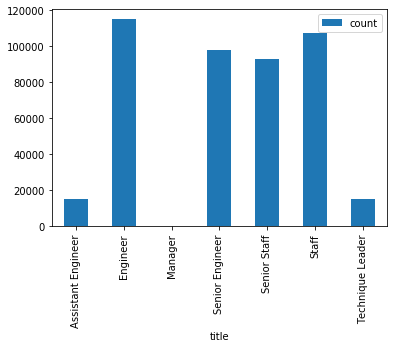

In [21]:
titles.groupby('title').emp_no.agg(['count']).plot.bar()

Join the employees and titles dataframes together.

In [26]:
emp_titles = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='left')
emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


Visualize how frequently employees change titles.

In [23]:
emp_titles.groupby('emp_no').title.agg(['count']).max()

count    3
dtype: int64

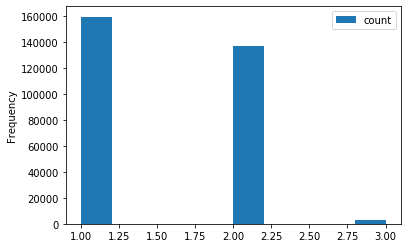

In [29]:
%matplotlib inline

emp_titles.groupby('emp_no').title.agg(['count']).plot.hist()

For each title, find the hire date of the employee that was hired most recently with that title.

In [30]:
emp_titles.groupby('title').hire_date.agg(['max'])

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [31]:
pd.read_sql('SHOW TABLES', url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


In [32]:
dep = pd.read_sql('SELECT * FROM current_dept_emp', url)
dep.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [33]:
departments = pd.read_sql('SELECT * FROM departments', url)
departments.head()

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [34]:
emp_titles_dep = pd.merge(emp_titles, dep, left_on='emp_no', right_on='emp_no', how='left')
emp_titles_dep

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,d005,1987-08-30,9999-01-01
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,d005,1987-08-30,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,d002,1993-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,d002,1993-12-27,9999-01-01


In [35]:
emp_titles_dep = pd.merge(emp_titles_dep, departments, left_on='dept_no', right_on='dept_no', how='left')
emp_titles_dep

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01,Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,d005,1987-08-30,9999-01-01,Development
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,d005,1987-08-30,9999-01-01,Development
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,d002,1993-12-27,9999-01-01,Finance
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,d002,1993-12-27,9999-01-01,Finance


In [36]:
pd.crosstab(emp_titles_dep.dept_name, emp_titles_dep.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,12698,14736,309
Development,6994,52096,2,44165,1247,1424,6883
Finance,0,0,2,0,10873,12507,0
Human Resources,0,0,2,0,11107,12984,0
Marketing,0,0,2,0,12734,14749,0
Production,5817,44944,4,38175,1270,1478,5934
Quality Management,1641,12615,4,10813,0,0,1640
Research,378,2986,2,2570,10347,12007,393
Sales,0,0,2,0,32577,37506,0


4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

What is the total price for each order?

In [37]:
url = get_db_url('chipotle')

chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [38]:
chipotle['item_price'] = chipotle['item_price'].replace('[\$]', '', regex=True).astype(float)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


What are the most popular 3 items?

In [39]:
chipotle.groupby('item_name').quantity.agg(['count']).nlargest(n=3,columns='count')

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479


Which item has produced the most revenue?

In [40]:
chipotle.groupby('item_name').item_price.agg(['sum']).nlargest(n=1, columns='sum')

,sum
item_name,
Chicken Bowl,7342.73
